In [1]:
import migrids_lite as mlt
import pandas as pd
from matplotlib import pyplot as plt

In [14]:
# get all the data
all_data = pd.read_csv('example_data.tab', delimiter='\t')

# get the electric load from the data
electric_load = mlt.EnergyType.EnergyType('electric_load', all_data['load'])

# get the resource available
solar_energy = mlt.EnergyType.EnergyType('resource', all_data['solar_energy'], multiplier=1)

In [15]:
# create a generator, this one is 400 kW
four_hund = mlt.Generator.Generator('four_hund', 400, 0.30, {0.50: 14, 1.00: 28})

# build the power house, this is required even if there's only 1 generator
power_house = mlt.Powerhouse.Powerhouse((four_hund,))

In [16]:
# calculate in resource offset mode
resource_offset = mlt.System.System(electric_load, power_house, 'r', resource_input=solar_energy)

calculating in resource offset mode


In [17]:
# print some useful things
print(resource_offset.src.frame)
print(resource_offset.fuel_usages.totals)

    diesel_out  resource  curtailed
0          120         0          0
1          250         0          0
2          240         0          0
3          230         0          0
4          220         0          0
5          190        10          0
6          175        15          0
7          195        25          0
8          180        35          0
9          195        45          0
10         190        60          0
11         185        70          0
12         145       100          0
13         170        70          0
14         170        60          0
15         205        45          0
16         220        35          0
17         235        25          0
18         230        15          0
19         225        10          0
20         220         0          0
21         200         0          0
22         230         0          0
23         235         0          0
24         240         0          0
{'total_fuel_used': np.float64(348.25), 'diesel_kwh_produced': n

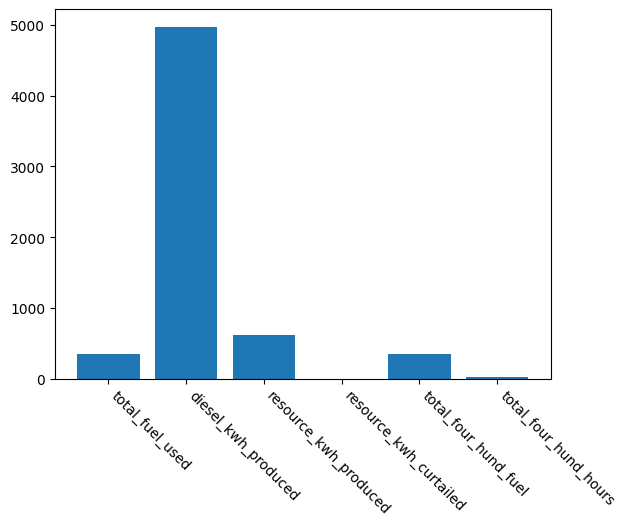

In [18]:
# let's plot the values
plt.bar(resource_offset.fuel_usages.totals.keys(), resource_offset.fuel_usages.totals.values())
plt.xticks(rotation = -45, ha='left')
plt.show()